<a href="https://colab.research.google.com/github/letme-hj/class2021Spring/blob/main/midterm_review_phonetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
from scipy.signal import lfilter

# **Phasor**
입력: amp, sr, dur, freq
1. time 생성<br>
`t = np.arange(1, sr*dur +1)/sr`
2. theta 생성<br>
`theta = t * (2pi * freq)`
3. s 생성 (sine phasor)<br>
`s = amp * sin(theta)`
4. c 생성 (complex phasor)<br>
`c = amp * np.exp(theta*1j)`

In [3]:
# 입력 파라미터
amp = 1 # 0~1
sr = 10000 # sampling rate, Hz
dur = 0.5 # sec
freq = 100.0 # sine frequency, Hz


In [4]:
# time 생성
t = np.arange(1, sr*dur +1)/sr # sequence가 생김

In [5]:
# phase(theta) 생성
theta = t* 2*np.pi*freq

In [6]:
# signal(s) 생성
s = amp * np.sin(theta)

In [7]:
ipd.Audio(s, rate = sr)

In [8]:
# signal(c) 생성
c = amp * np.exp(theta*1j)

In [9]:
ipd.Audio(c.imag, rate=sr)

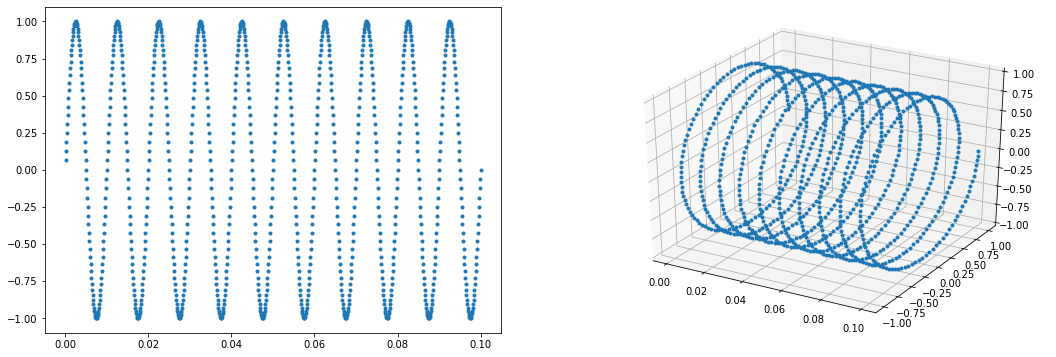

In [10]:
fig = plt.figure(figsize = (18,6))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection = '3d')
ax.plot(t[0:1000], s[0:1000], '.')
ax2.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')


In [11]:
import plotly.graph_objects as go
import numpy as np

x,y,z = t[0:200], c.real[0:200], c.imag[0:200] # time이랑 signal이 같은 수의 components로 서로 correspond하게 만들어져있음!! 중요해
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
    xaxis_title='time(sec)',
    yaxis_title='real',
    zaxis_title='imag'
))

fig.show()

In [16]:
# phasor 완성~

def phasor_sine(amp, sr, dur, freq):
  t = np.arange(1, sr*dur+1)/sr
  theta = t * 2*np.pi*freq
  s = amp * np.sin(theta)
  return s, t, theta

def phasor_complex(amp, sr, dur, freq):
  t = np.arange(1, sr*dur +1)/sr
  theta = t * 2*np.pi * freq
  c = amp * np.exp(theta * 1j)
  return c, t, theta

# Generating a vowel sound
### 1. Source<br>
- **F0** : fundametal frequency (F0의 배수로 이루어진 source를 만들 것)
- **Fend** : Nyquist frequency (sampling rate / 2)
- `s_all = np.zeros(len(t))` 에서 출발, F0의 배수 frequency들에 대해 같은 길이의 벡터를 만들어 축적할 것

### 2. Filter<br>
특정 모음을 소리내도록 필터를 추가하고 싶다면 (ex. /a/ /e/ /i/ /o/ /u/)
- **F0**에 해당하는 필터 : 0Hz에 BW 100 짜리 필터(resonance)를 추가 (사람의 목소리가 고주파로 갈수록 주파수 성분 줄어드는 것 표현) -> source 완성..? <br>(_여기서 완성되는 건지 1번에서 완성되는 건지.. 1번에서 pulse train을 만드는 건 확실한 듯. 그렇담 pulst train이랑 source랑 완전히 같은 개념인가?! 교수님 자료에 그렇게 나와있으니 그런 걸로 ㅎㅎ_)
- **F1**에 해당하는 필터 : F1에 해당하는 주파수에 F1에 해당하는 BW의 필터 추가
- **F2**에 해당하는 필터 : F2에 해당하는 주파수에 F2에 해당하는 BW의 필터 추가


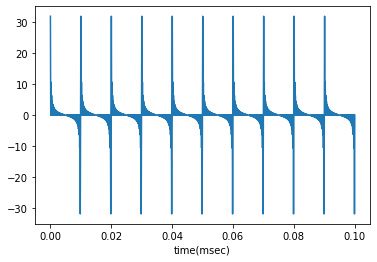

In [17]:
# parameter setting
amp = 1
sr = 10000
dur = 0.5


# Source 만들기

F0 = 100 # fundamental frequency
Fend = int(sr/2) # Nyquist frequency

# 일정 길이의 sound 벡터를 frequency 별로 만들어 다 더해줄 것
# 결국 wave 만들어내는 게 phasor. 기본적으로 simplex tone을 만들어내고, 그걸 반복해서 쌓아 complex tone도 만듦
s_all = 0
for freq in range(F0, Fend+1, F0):
  s, t, theta = phasor_sine(amp, sr, dur, freq)
  s_all += s

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s_all[0:1000])
ax.set_xlabel('time(msec)')
ipd.Audio(s_all, rate = sr)

In [18]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [21]:
# filter 추가하기

# 첫번째 기본 필터
RG = 0
BWG = 100
a, b = resonance(sr, RG, BWG)
s = lfilter(b, a, s, axis=0)

# 두번째 필터 (F1)
RG = 750
BWG = 90
a, b = resonance(sr, RG, BWG)
s = lfilter(b, a, s, axis=0)

# 세번째 필터 (F2)
RG = 1187
BWG = 110
a, b = resonance(sr, RG, BWG)
s = lfilter(b, a, s, axis=0)

# 네번째 필터 (F3)
RG = 2595
BWG = 170
a, b = resonance(sr, RG, BWG)
s = lfilter(b, a, s, axis=0)

# 다섯번째 필터 (F4)
RG = 3781
BWG = 250
a, b = resonance(sr, RG, BWG)
s = lfilter(b, a, s, axis=0)

# 여섯번째 필터 (F5)
RG = 4200
BWG = 300
a, b = resonance(sr, RG, BWG)
s = lfilter(b, a, s, axis=0)

s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)

# Fourier Transform
wav 파일에 대한 spectral analysis (Fourier Spectral Analysis)를 진행하는 것. 주파수 별 성분이 드러나게! by dot product btw vectors.<br> **WAVE to SPECTRUM**

- 주어진 wave와 길이가 같은 sine wave 벡터를 여러 frequency 별로 만든다. (저주파 ~ 최고주파수: sampling rate)
- 주어진 wave와 각각의 sine wave를 dot product 한다.
- dot product 결과를 각 frequency 별로 표시한다 (Spectrum)

**단, sine wave로 여러개 형성할 경우, dot product 시 phase에 sensitive하게 결과가 달라진다는 한계 때문에 complex wave로 생성**

In [24]:
# 로컬 pc에서 파일 불러오기
from google.colab import files
!rm *.wav
tmp = files.upload()
fn = list(tmp)[0]

rm: cannot remove '*.wav': No such file or directory


Saving 20210331.wav to 20210331.wav


In [27]:
from scipy.io import wavfile
sr, s = wavfile.read(fn)
nSamp = len(s)
dur = nSamp / sr # 전체 점 개수 / 1초에 찍히는 점 개수 = n초
t = np.linspace(1/sr, dur, nSamp) # 의미가 뭐지

Text(0, 0.5, 'amplitude')

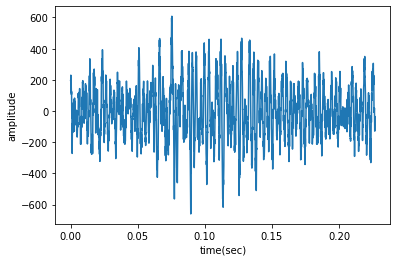

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:10000], s[0:10000])
ax.set_xlabel('time(sec)')
ax.set_ylabel('amplitude')

In [33]:
# 본격적인 푸리에 변환

nFFT = 512 # 최초 frequency(f0..?)이자 분석할 frequency 간격
freq = []
amp = []
for n in range(1,nFFT+1):
  freq.append(sr*n/nFFT)
  c, t, theta = phasor_complex(1, sr, dur, freq[-1])
  amp.append(np.abs(np.dot(s, c)))

Text(0, 0.5, 'amplitude')

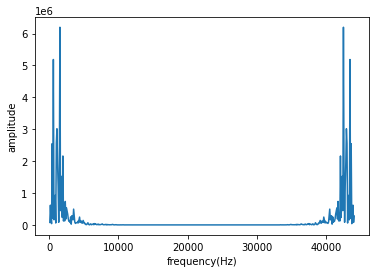

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(freq, amp)
ax.set_xlabel('frequency(Hz)')
ax.set_ylabel('amplitude')